In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image, display
import time
from scipy import ndimage
import os

✅ Изображение загружено: sample.jpg


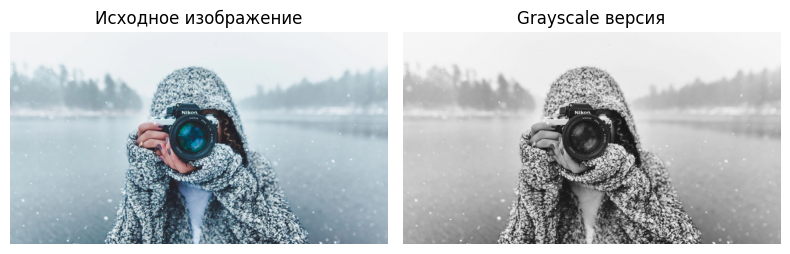

In [5]:
# Загружаем изображение
img_path = 'sample.jpg'

if os.path.exists(img_path):
    img_hw = cv2.imread(img_path)
    img_rgb_hw = cv2.cvtColor(img_hw, cv2.COLOR_BGR2RGB)
    img_gray_hw = cv2.cvtColor(img_hw, cv2.COLOR_BGR2GRAY)
    print(f"✅ Изображение загружено: {img_path}")
else:
    # Если файл не существует, создаем тестовое изображение
    print("⚠️ Файл sample.jpg не найден. Создаем тестовое изображение...")
    img_hw = np.zeros((400, 500, 3), dtype=np.uint8)
    img_hw[50:150, 50:200] = [200, 200, 200]
    img_hw[200:300, 50:200] = [100, 100, 100]
    cv2.circle(img_hw, (350, 100), 50, (150, 150, 150), -1)
    cv2.circle(img_hw, (350, 250), 40, (50, 50, 50), 3)
    cv2.line(img_hw, (100, 320), (400, 350), (180, 180, 180), 2)
    cv2.line(img_hw, (250, 50), (250, 350), (120, 120, 120), 4)
    img_rgb_hw = cv2.cvtColor(img_hw, cv2.COLOR_BGR2RGB)
    img_gray_hw = cv2.cvtColor(img_hw, cv2.COLOR_BGR2GRAY)

# Отображаем изображение для домашнего задания
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.imshow(img_rgb_hw)
plt.title('Исходное изображение')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(img_gray_hw, cmap='gray')
plt.title('Grayscale версия')
plt.axis('off')
plt.tight_layout()
plt.show()

🔧 Тестируем адаптивный алгоритм Canny...


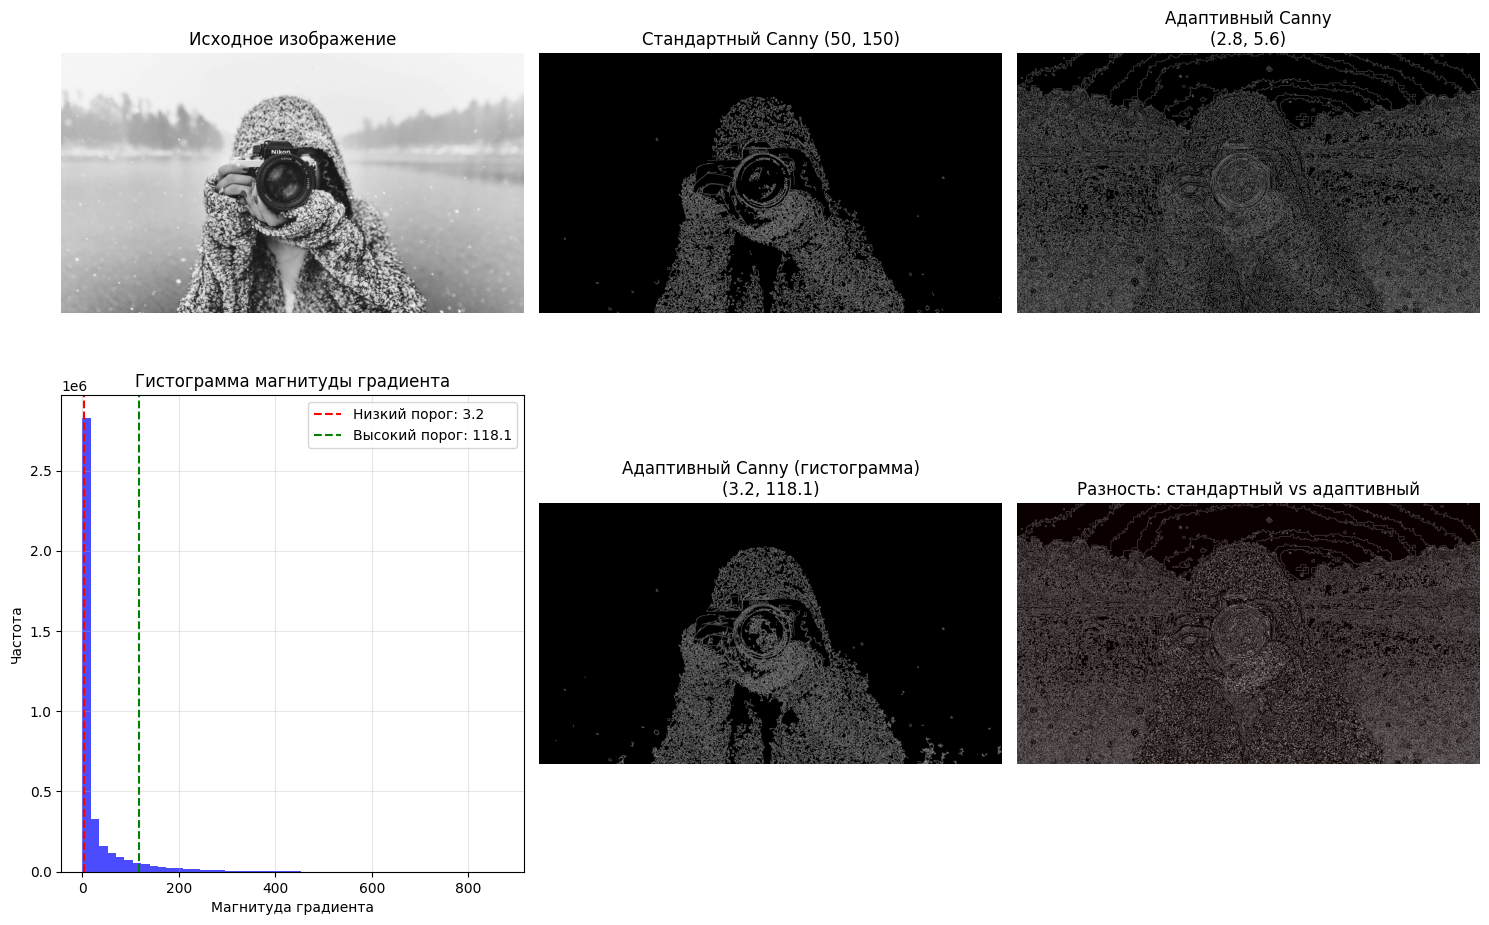

📊 Результаты адаптивного Canny:
  Метод 1 (медиана): низкий порог = 2.8, высокий порог = 5.6
  Метод 2 (процентили): низкий порог = 3.2, высокий порог = 118.1


In [6]:
# ===============================
# ЗАДАНИЕ 1: Адаптивный алгоритм Canny
# ===============================

def adaptive_canny(image, sigma=0.33, blur_kernel=5, blur_sigma=1.4):
    """
    Адаптивный алгоритм Canny, который автоматически подбирает пороги
    на основе анализа гистограммы градиентов.

    Parameters:
    - image: входное изображение в градациях серого
    - sigma: коэффициент для определения порогов (стандартное значение 0.33)
    - blur_kernel: размер ядра для гауссова размытия
    - blur_sigma: сигма для гауссова размытия

    Returns:
    - edges: бинарная карта границ
    - low_threshold: автоматически вычисленный нижний порог
    - high_threshold: автоматически вычисленный верхний порог
    """

    # Шаг 1: Подавление шума
    blurred = cv2.GaussianBlur(image, (blur_kernel, blur_kernel), blur_sigma)

    # Шаг 2: Вычисление градиента
    grad_x = cv2.Sobel(blurred, cv2.CV_64F, 1, 0, ksize=3)
    grad_y = cv2.Sobel(blurred, cv2.CV_64F, 0, 1, ksize=3)

    # Вычисление магнитуды градиента
    magnitude = np.sqrt(grad_x**2 + grad_y**2)

    # Анализ гистограммы градиентов для автоматического определения порогов
    median_magnitude = np.median(magnitude)

    # Автоматический подбор порогов на основе медианы
    low_threshold = max(0, (1.0 - sigma) * median_magnitude)
    high_threshold = min(255, (1.0 + sigma) * median_magnitude)

    # Применяем алгоритм Canny с автоматически подобранными порогами
    edges = cv2.Canny(blurred, low_threshold, high_threshold)

    return edges, low_threshold, high_threshold

def adaptive_canny_with_histogram(image, sigma=0.33):
    """
    Улучшенная версия адаптивного Canny с визуализацией гистограммы градиентов.
    """
    # Вычисляем градиент
    grad_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
    grad_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)
    magnitude = np.sqrt(grad_x**2 + grad_y**2)

    # Анализируем гистограмму градиентов
    magnitude_flat = magnitude.flatten()

    # Убираем нулевые значения для лучшего анализа
    magnitude_nonzero = magnitude_flat[magnitude_flat > 0]

    if len(magnitude_nonzero) > 0:
        # Используем процентили для определения порогов
        low_percentile = 10  # Нижний процентиль
        high_percentile = 90  # Верхний процентиль

        low_threshold = np.percentile(magnitude_nonzero, low_percentile)
        high_threshold = np.percentile(magnitude_nonzero, high_percentile)
    else:
        # Если все градиенты нулевые, используем стандартные значения
        low_threshold = 50
        high_threshold = 150

    # Применяем Canny
    edges = cv2.Canny(image, low_threshold, high_threshold)

    return edges, low_threshold, high_threshold, magnitude

# Тестируем адаптивный Canny
print("🔧 Тестируем адаптивный алгоритм Canny...")
adaptive_edges, low_thresh, high_thresh = adaptive_canny(img_gray_hw)
adaptive_edges2, low_thresh2, high_thresh2, grad_mag = adaptive_canny_with_histogram(img_gray_hw)

# Сравнение с обычным Canny
standard_canny = cv2.Canny(img_gray_hw, 50, 150)

# Визуализация результатов
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Исходное изображение
axes[0, 0].imshow(img_gray_hw, cmap='gray')
axes[0, 0].set_title('Исходное изображение')
axes[0, 0].axis('off')

# Стандартный Canny
axes[0, 1].imshow(standard_canny, cmap='gray')
axes[0, 1].set_title(f'Стандартный Canny (50, 150)')
axes[0, 1].axis('off')

# Адаптивный Canny (метод 1)
axes[0, 2].imshow(adaptive_edges, cmap='gray')
axes[0, 2].set_title(f'Адаптивный Canny\n({low_thresh:.1f}, {high_thresh:.1f})')
axes[0, 2].axis('off')

# Гистограмма градиентов
axes[1, 0].hist(grad_mag.flatten(), bins=50, color='blue', alpha=0.7)
axes[1, 0].axvline(x=low_thresh2, color='red', linestyle='--', label=f'Низкий порог: {low_thresh2:.1f}')
axes[1, 0].axvline(x=high_thresh2, color='green', linestyle='--', label=f'Высокий порог: {high_thresh2:.1f}')
axes[1, 0].set_title('Гистограмма магнитуды градиента')
axes[1, 0].set_xlabel('Магнитуда градиента')
axes[1, 0].set_ylabel('Частота')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# Адаптивный Canny (метод 2)
axes[1, 1].imshow(adaptive_edges2, cmap='gray')
axes[1, 1].set_title(f'Адаптивный Canny (гистограмма)\n({low_thresh2:.1f}, {high_thresh2:.1f})')
axes[1, 1].axis('off')

# Сравнение
difference = np.abs(standard_canny.astype(float) - adaptive_edges.astype(float))
axes[1, 2].imshow(difference, cmap='hot')
axes[1, 2].set_title('Разность: стандартный vs адаптивный')
axes[1, 2].axis('off')

plt.tight_layout()
plt.show()

print(f"📊 Результаты адаптивного Canny:")
print(f"  Метод 1 (медиана): низкий порог = {low_thresh:.1f}, высокий порог = {high_thresh:.1f}")
print(f"  Метод 2 (процентили): низкий порог = {low_thresh2:.1f}, высокий порог = {high_thresh2:.1f}")

🔧 Детекция границ по ориентации...


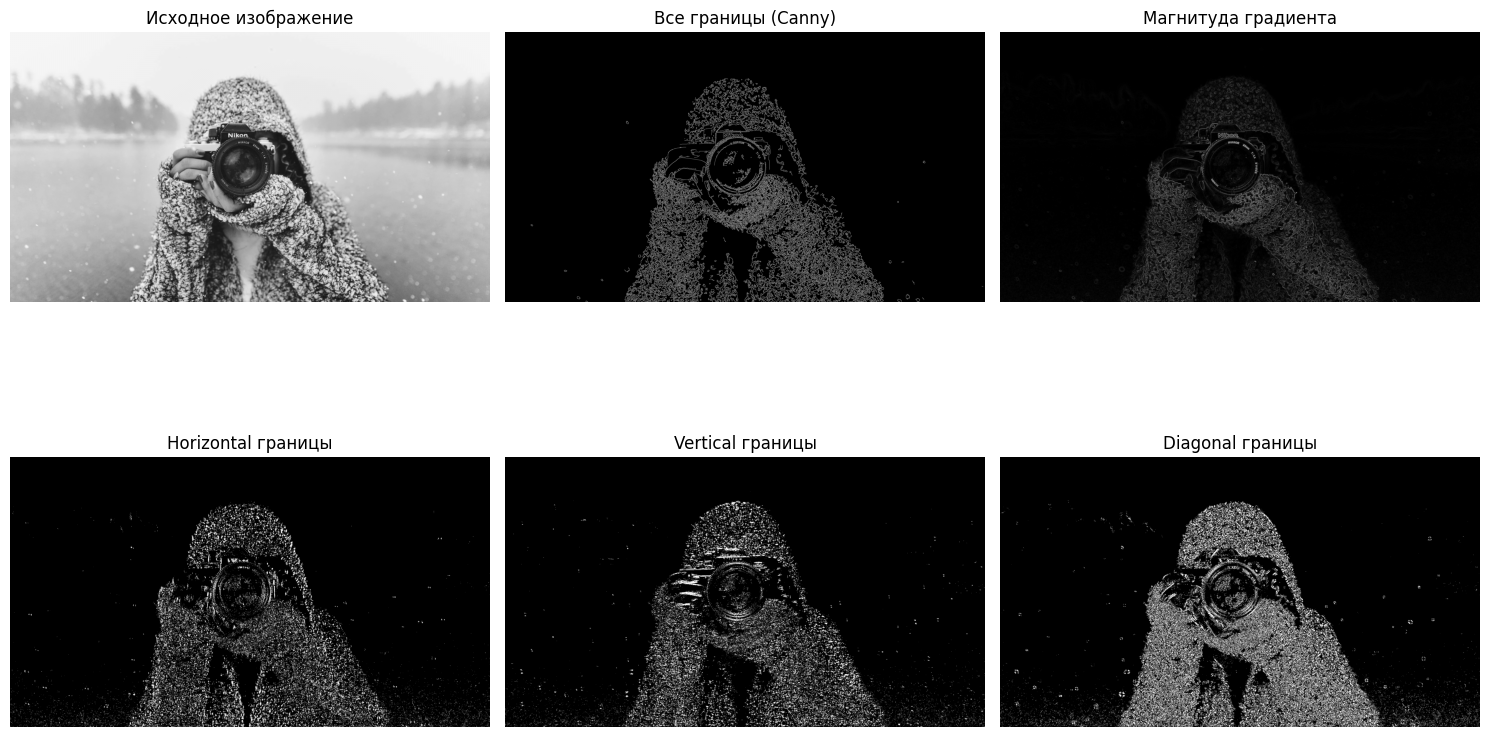

In [7]:
# ===============================
# ЗАДАНИЕ 2: Детекция границ определенной ориентации
# ===============================

def detect_edges_by_orientation(image, orientation='horizontal', threshold=30):
    """
    Детектирует границы определенной ориентации.

    Parameters:
    - image: входное изображение в градациях серого
    - orientation: 'horizontal', 'vertical', или 'diagonal'
    - threshold: порог для фильтрации слабых градиентов

    Returns:
    - oriented_edges: бинарное изображение с границами заданной ориентации
    """

    # Вычисляем градиенты
    grad_x = cv2.Sobel(image, cv2.CV_32F, 1, 0, ksize=3)
    grad_y = cv2.Sobel(image, cv2.CV_32F, 0, 1, ksize=3)

    # Вычисляем магнитуду и направление
    magnitude = np.sqrt(grad_x**2 + grad_y**2)
    direction = np.arctan2(grad_y, grad_x) * 180 / np.pi
    direction[direction < 0] += 180  # Приводим к диапазону [0, 180)

    # Создаем маску для определенной ориентации
    oriented_edges = np.zeros_like(image, dtype=np.uint8)

    if orientation == 'horizontal':
        # Горизонтальные границы (0° или 180° ± 22.5°)
        mask = ((direction >= 0) & (direction <= 22.5)) | ((direction >= 157.5) & (direction <= 180))
    elif orientation == 'vertical':
        # Вертикальные границы (90° ± 22.5°)
        mask = (direction >= 67.5) & (direction <= 112.5)
    elif orientation == 'diagonal':
        # Диагональные границы (45° ± 22.5° и 135° ± 22.5°)
        mask = ((direction >= 22.5) & (direction <= 67.5)) | ((direction >= 112.5) & (direction <= 157.5))
    else:
        raise ValueError("Ориентация должна быть 'horizontal', 'vertical' или 'diagonal'")

    # Применяем порог по магнитуде
    strong_edges = magnitude > threshold

    # Комбинируем маску ориентации с порогом магнитуды
    final_mask = mask & strong_edges

    # Создаем выходное изображение
    oriented_edges[final_mask] = 255

    return oriented_edges, magnitude, direction

def visualize_edge_orientations(image, orientations=['horizontal', 'vertical', 'diagonal']):
    """
    Визуализирует границы различных ориентаций.
    """
    results = {}

    for orientation in orientations:
        edges, magnitude, direction = detect_edges_by_orientation(image, orientation)
        results[orientation] = {
            'edges': edges,
            'magnitude': magnitude,
            'direction': direction
        }

    # Визуализация
    fig, axes = plt.subplots(2, 3, figsize=(15, 10))

    # Исходное изображение
    axes[0, 0].imshow(image, cmap='gray')
    axes[0, 0].set_title('Исходное изображение')
    axes[0, 0].axis('off')

    # Все границы (Canny для сравнения)
    all_edges = cv2.Canny(image, 50, 150)
    axes[0, 1].imshow(all_edges, cmap='gray')
    axes[0, 1].set_title('Все границы (Canny)')
    axes[0, 1].axis('off')

    # Магнитуда градиента
    magnitude_normalized = cv2.normalize(results['horizontal']['magnitude'], None, 0, 255, cv2.NORM_MINMAX)
    axes[0, 2].imshow(magnitude_normalized.astype(np.uint8), cmap='gray')
    axes[0, 2].set_title('Магнитуда градиента')
    axes[0, 2].axis('off')

    # Границы по ориентациям
    for i, orientation in enumerate(orientations):
        axes[1, i].imshow(results[orientation]['edges'], cmap='gray')
        axes[1, i].set_title(f'{orientation.capitalize()} границы')
        axes[1, i].axis('off')

    plt.tight_layout()
    plt.show()

    return results

print("🔧 Детекция границ по ориентации...")
orientation_results = visualize_edge_orientations(img_gray_hw)

🔧 Исследуем влияние шума на детекцию границ...
🔧 Тестируем влияние шума типа 'gaussian'...
🔧 Тестируем влияние шума типа 'salt_pepper'...
🔧 Тестируем влияние шума типа 'speckle'...


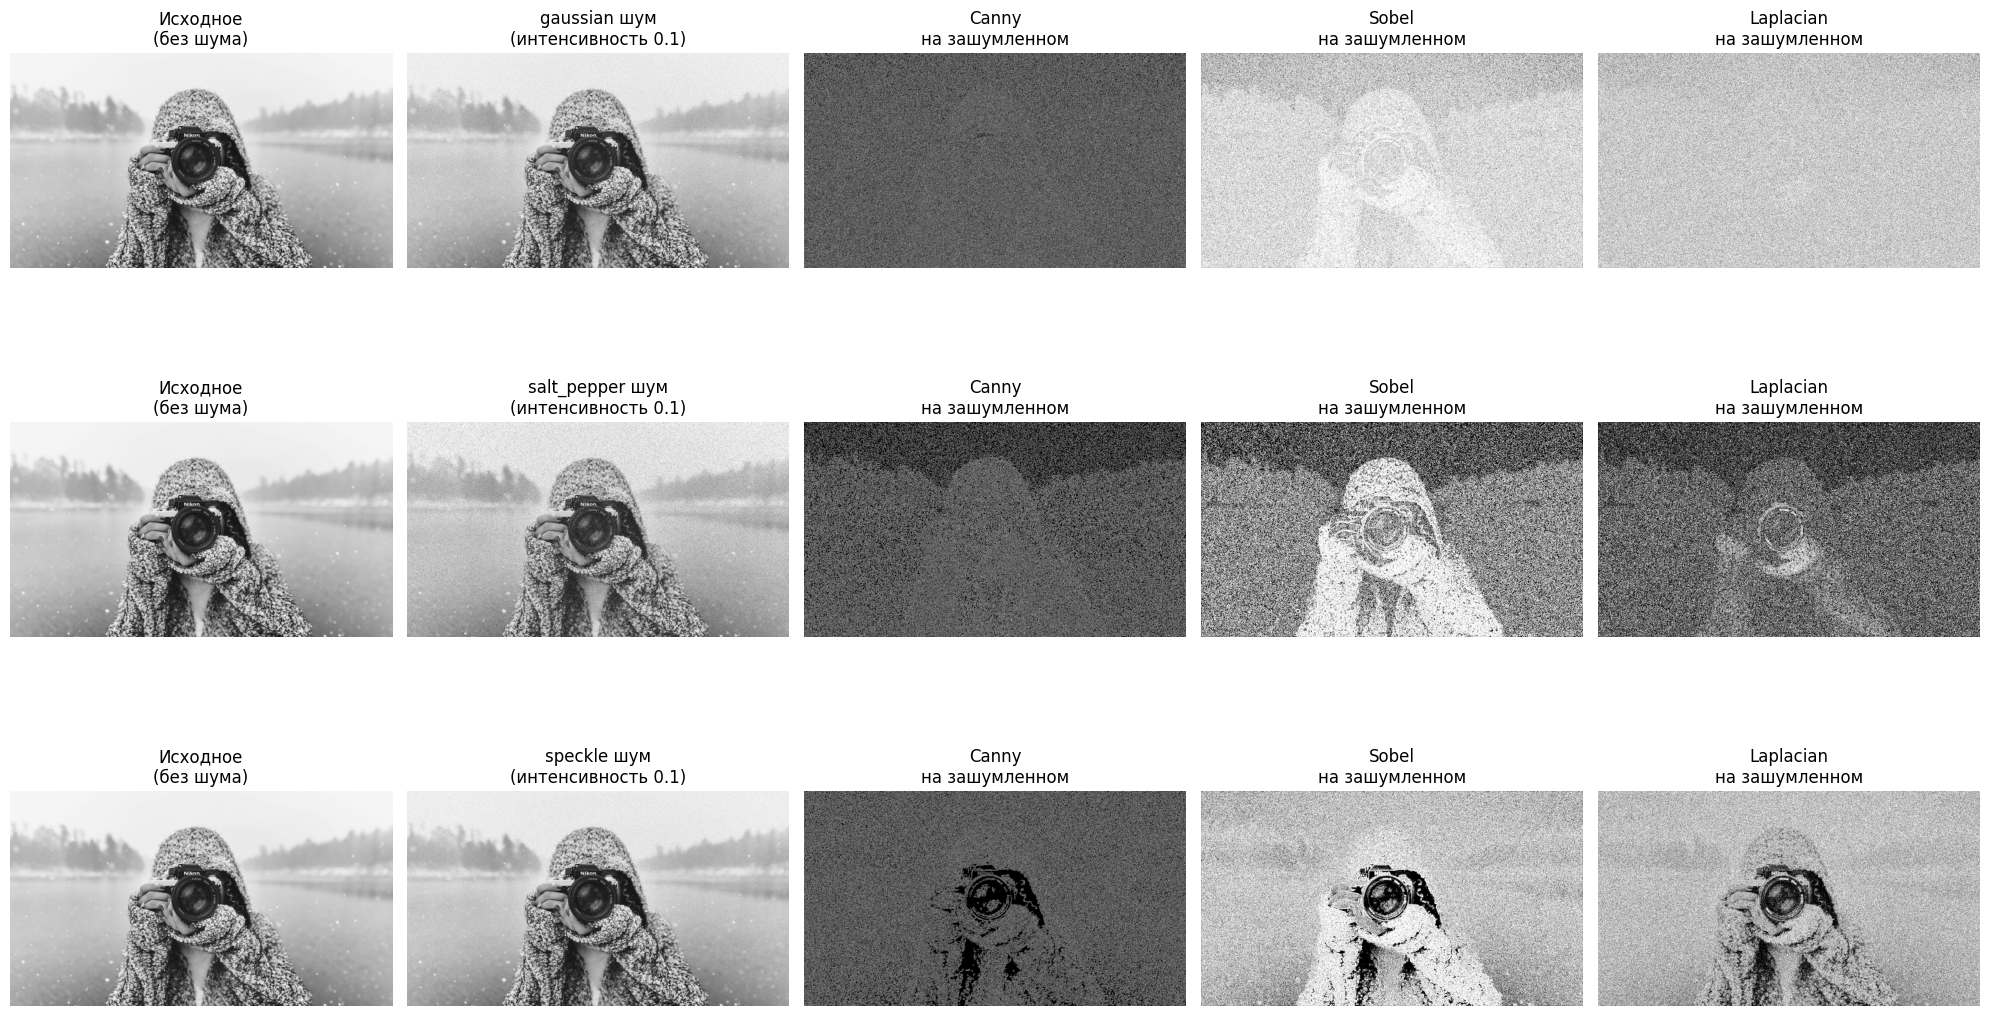


📊 Количественный анализ влияния шума:

Тип шума: gaussian
--------------------------------------------------
  Интенсивность 0.05:
    Количество границ: 1062344 (изменение: 483.7%)
    Средняя разность с эталоном: 66.05
  Интенсивность 0.1:
    Количество границ: 1425219 (изменение: 683.1%)
    Средняя разность с эталоном: 91.97
  Интенсивность 0.2:
    Количество границ: 1454539 (изменение: 699.2%)
    Средняя разность с эталоном: 95.75

Тип шума: salt_pepper
--------------------------------------------------
  Интенсивность 0.05:
    Количество границ: 926141 (изменение: 408.9%)
    Средняя разность с эталоном: 55.51
  Интенсивность 0.1:
    Количество границ: 1268234 (изменение: 596.8%)
    Средняя разность с эталоном: 80.90
  Интенсивность 0.2:
    Количество границ: 1444001 (изменение: 693.4%)
    Средняя разность с эталоном: 94.89

Тип шума: speckle
--------------------------------------------------
  Интенсивность 0.05:
    Количество границ: 531388 (изменение: 192.0%)
    Сре

In [8]:
# ===============================
# ЗАДАНИЕ 3: Влияние шума на детекцию границ
# ===============================

def add_noise_to_image(image, noise_type='gaussian', intensity=0.1):
    """
    Добавляет шум к изображению.

    Parameters:
    - image: входное изображение
    - noise_type: тип шума ('gaussian', 'salt_pepper', 'speckle')
    - intensity: интенсивность шума (0-1)

    Returns:
    - noisy_image: зашумленное изображение
    """
    noisy_image = image.copy().astype(np.float32) / 255.0

    if noise_type == 'gaussian':
        # Гауссовский шум
        noise = np.random.normal(0, intensity, image.shape)
        noisy_image = noisy_image + noise

    elif noise_type == 'salt_pepper':
        # Соль-перец
        noisy_image = noisy_image.copy()
        # Соль (белые пиксели)
        salt = np.random.random(image.shape) < intensity/2
        noisy_image[salt] = 1.0
        # Перец (черные пиксели)
        pepper = np.random.random(image.shape) < intensity/2
        noisy_image[pepper] = 0.0

    elif noise_type == 'speckle':
        # Мультипликативный шум
        noise = np.random.normal(0, intensity, image.shape)
        noisy_image = noisy_image + noisy_image * noise

    else:
        raise ValueError("Тип шума должен быть 'gaussian', 'salt_pepper' или 'speckle'")

    # Обрезаем значения до допустимого диапазона
    noisy_image = np.clip(noisy_image, 0, 1)
    noisy_image = (noisy_image * 255).astype(np.uint8)

    return noisy_image

def evaluate_edge_detection_with_noise(image, noise_types=['gaussian', 'salt_pepper', 'speckle']):
    """
    Исследует влияние различных типов шума на детекцию границ.
    """

    results = {}

    for noise_type in noise_types:
        print(f"🔧 Тестируем влияние шума типа '{noise_type}'...")

        # Добавляем шум с разной интенсивностью
        noise_levels = [0.05, 0.1, 0.2]
        noise_results = {}

        for level in noise_levels:
            # Создаем зашумленное изображение
            noisy_image = add_noise_to_image(image, noise_type, level)

            # Применяем различные детекторы границ
            # 1. Canny
            canny_edges = cv2.Canny(noisy_image, 50, 150)

            # 2. Sobel
            sobel_x = cv2.Sobel(noisy_image, cv2.CV_32F, 1, 0, ksize=3)
            sobel_y = cv2.Sobel(noisy_image, cv2.CV_32F, 0, 1, ksize=3)
            sobel_mag = np.sqrt(sobel_x**2 + sobel_y**2)
            sobel_edges = cv2.convertScaleAbs(sobel_mag)
            _, sobel_edges = cv2.threshold(sobel_edges, 50, 255, cv2.THRESH_BINARY)

            # 3. Laplacian
            laplacian = cv2.Laplacian(noisy_image, cv2.CV_32F)
            laplacian_edges = cv2.convertScaleAbs(laplacian)
            _, laplacian_edges = cv2.threshold(laplacian_edges, 30, 255, cv2.THRESH_BINARY)

            # Сохраняем результаты
            noise_results[level] = {
                'noisy_image': noisy_image,
                'canny': canny_edges,
                'sobel': sobel_edges,
                'laplacian': laplacian_edges
            }

        results[noise_type] = noise_results

    # Визуализация результатов
    fig, axes = plt.subplots(len(noise_types), 5, figsize=(20, 4*len(noise_types)))

    if len(noise_types) == 1:
        axes = axes.reshape(1, -1)

    for i, noise_type in enumerate(noise_types):
        # Исходное изображение
        axes[i, 0].imshow(image, cmap='gray')
        axes[i, 0].set_title(f'Исходное\n(без шума)')
        axes[i, 0].axis('off')

        # Зашумленное изображение (интенсивность 0.1)
        noisy_img = results[noise_type][0.1]['noisy_image']
        axes[i, 1].imshow(noisy_img, cmap='gray')
        axes[i, 1].set_title(f'{noise_type} шум\n(интенсивность 0.1)')
        axes[i, 1].axis('off')

        # Canny на зашумленном изображении
        axes[i, 2].imshow(results[noise_type][0.1]['canny'], cmap='gray')
        axes[i, 2].set_title(f'Canny\nна зашумленном')
        axes[i, 2].axis('off')

        # Sobel на зашумленном изображении
        axes[i, 3].imshow(results[noise_type][0.1]['sobel'], cmap='gray')
        axes[i, 3].set_title(f'Sobel\nна зашумленном')
        axes[i, 3].axis('off')

        # Laplacian на зашумленном изображении
        axes[i, 4].imshow(results[noise_type][0.1]['laplacian'], cmap='gray')
        axes[i, 4].set_title(f'Laplacian\nна зашумленном')
        axes[i, 4].axis('off')

    plt.tight_layout()
    plt.show()

    # Количественный анализ
    print("\n📊 Количественный анализ влияния шума:")

    # Границы на исходном изображении (эталон)
    reference_edges = cv2.Canny(image, 50, 150)
    reference_edge_count = np.sum(reference_edges > 0)

    for noise_type in noise_types:
        print(f"\nТип шума: {noise_type}")
        print("-" * 50)

        for level in [0.05, 0.1, 0.2]:
            # Считаем разницу с эталоном
            noisy_edges = results[noise_type][level]['canny']
            noisy_edge_count = np.sum(noisy_edges > 0)

            # Вычисляем метрики
            difference = np.abs(reference_edges.astype(float) - noisy_edges.astype(float))
            mean_difference = np.mean(difference)

            # Процент изменения количества границ
            edge_change_pct = abs(noisy_edge_count - reference_edge_count) / reference_edge_count * 100

            print(f"  Интенсивность {level}:")
            print(f"    Количество границ: {noisy_edge_count} (изменение: {edge_change_pct:.1f}%)")
            print(f"    Средняя разность с эталоном: {mean_difference:.2f}")

    return results

print("🔧 Исследуем влияние шума на детекцию границ...")
noise_results = evaluate_edge_detection_with_noise(img_gray_hw)